In [113]:
#import the necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler , StandardScaler
import plotly.express as px
import pickle

1. Data Analysis:
• Analyze the dataset to:
• Identify family-level and member-level spending patterns.
• Understand correlations between financial metrics (e.g., income vs.
expenses, savings vs. spending habits).

In [114]:
data = pd.read_excel("/Users/lipikas/Downloads/family_financial_and_transactions_data.xlsx")
data.head()

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
0,FAM001,FAM001_Member1,2024-10-07,Travel,409.12,113810,20234,5781,2422,2959,2,68
1,FAM001,FAM001_Member1,2024-10-16,Travel,270.91,113810,20234,5781,2422,2959,2,68
2,FAM001,FAM001_Member1,2024-10-17,Groceries,91.10,113810,20234,5781,2422,2959,2,68
3,FAM001,FAM001_Member1,2024-10-25,Healthcare,198.23,113810,20234,5781,2422,2959,2,68
4,FAM001,FAM001_Member1,2024-10-25,Education,206.42,113810,20234,5781,2422,2959,2,68


In [115]:
#Checking for null values , description of data and univeriate analysis like mean , median and mode

data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16306 entries, 0 to 16305
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Family ID                16306 non-null  object        
 1   Member ID                16306 non-null  object        
 2   Transaction Date         16306 non-null  datetime64[ns]
 3   Category                 16306 non-null  object        
 4   Amount                   16306 non-null  float64       
 5   Income                   16306 non-null  int64         
 6   Savings                  16306 non-null  int64         
 7   Monthly Expenses         16306 non-null  int64         
 8   Loan Payments            16306 non-null  int64         
 9   Credit Card Spending     16306 non-null  int64         
 10  Dependents               16306 non-null  int64         
 11  Financial Goals Met (%)  16306 non-null  int64         
dtypes: datetime64[ns](1), float64(1)

,Transaction Date,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
count,16306,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000
mean,2024-10-16 00:34:31.777259776,256.368534,90340.503925,24473.998038,3948.522384,2529.978965,1782.880535,3.201521,59.418006
min,2024-10-01 00:00:00,10.030000,30851.000000,1037.000000,1013.000000,3.000000,510.000000,0.000000,21.000000
25%,2024-10-08 00:00:00,134.820000,59871.000000,11016.000000,2582.000000,1390.000000,1221.000000,2.000000,37.000000
50%,2024-10-16 00:00:00,256.055000,90142.000000,25504.000000,3721.000000,2548.000000,1705.000000,3.000000,58.000000
75%,2024-10-24 00:00:00,379.240000,119733.000000,37422.000000,5450.000000,3724.000000,2422.000000,4.000000,79.000000
max,2024-10-31 00:00:00,499.910000,149871.000000,49217.000000,6968.000000,4974.000000,2999.000000,5.000000,100.000000
std,NaN,141.153813,34740.834136,14828.955695,1689.987801,1384.105561,716.595101,1.468880,23.444304


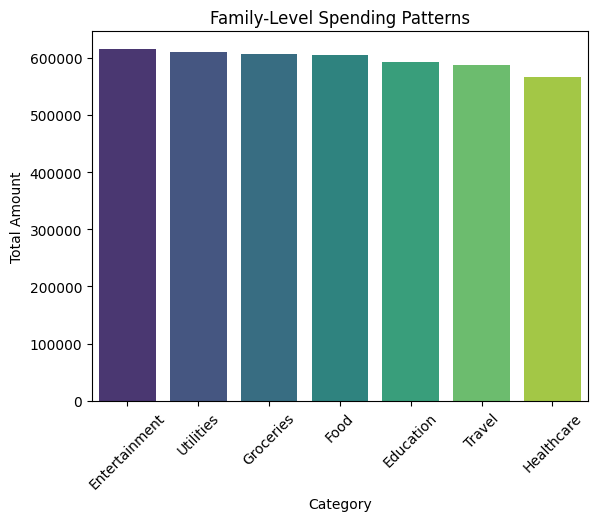

In [116]:
#indentify the family sending

family_spending = data.groupby("Category")["Amount"].sum().sort_values(ascending = False)
family_spending

#Plot

sns.barplot(x=family_spending.index, y=family_spending.values, palette="viridis")
plt.title("Family-Level Spending Patterns")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.show()

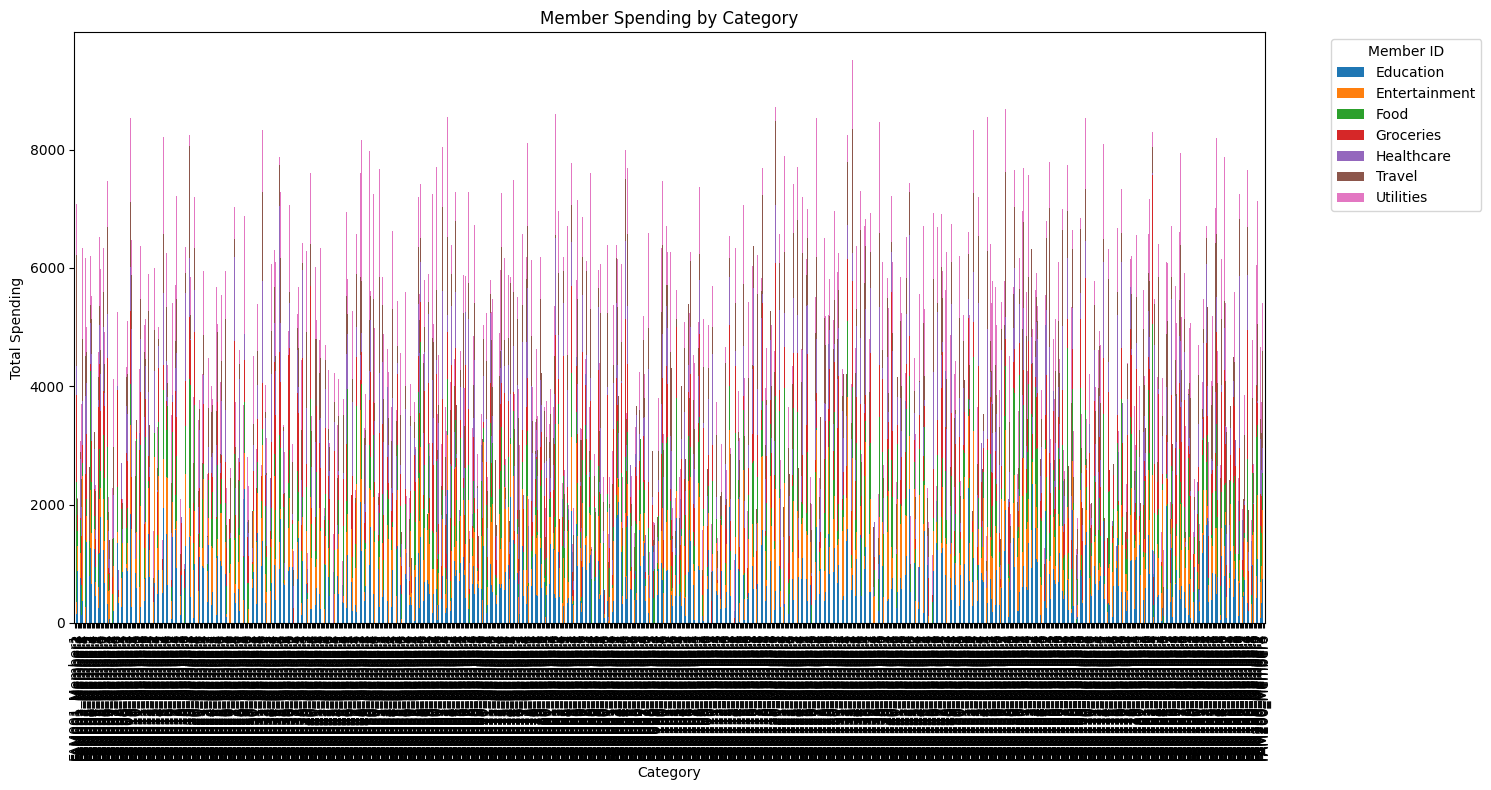

In [117]:
member_spending = data.groupby(["Member ID" ,"Category"])["Amount"].sum().unstack(fill_value=0)

# Plot stacked bar plot
member_spending.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title("Member Spending by Category")
plt.xlabel("Category")
plt.ylabel("Total Spending")
plt.legend(title="Member ID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




In [118]:
data.columns

Index(['Family ID', 'Member ID', 'Transaction Date', 'Category', 'Amount',
       'Income', 'Savings', 'Monthly Expenses', 'Loan Payments',
       'Credit Card Spending', 'Dependents', 'Financial Goals Met (%)'],
      dtype='object')

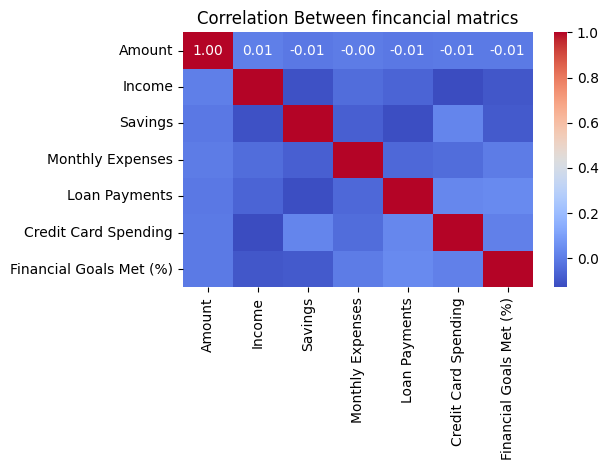

In [119]:
#Understand correlations between financial metrics (e.g., income vs.expenses, savings vs. spending habits).

aggregate_data = data.groupby("Amount").agg({
    "Income" : "mean",
'Savings': 'mean',
    'Monthly Expenses':'mean',
    'Loan Payments' :'mean',
    'Credit Card Spending':'mean',
    'Financial Goals Met (%)' : 'mean'
}).reset_index()

correlation_matrix = aggregate_data.corr()


sns.heatmap(correlation_matrix , annot = True , fmt = '.2f' , cmap = 'coolwarm' , cbar = True)
plt.title("Correlation Between fincancial matrics")
plt.tight_layout()
plt.show()


In [120]:
data['Savings_to_income'] = (data['Savings']/data['Income'])*100
data['Monthly_Expenses'] = (data['Monthly Expenses']/data['Income'])*100
data['Loan_Payments'] = (data['Loan Payments']/data['Income'])*100
data['Credit_Card_Spending'] = (data['Credit Card Spending']/data['Income'])*100

def calculate_financial_scores(row):
    savings_score = min(20, row['Savings_to_income']/5)
    Expenses_score = max(0,15 -row['Monthly_Expenses']/10)
    loan_score = max(0,10 - row['Loan_Payments']/5)
    credit_card_score = max(0,10-row['Credit_Card_Spending']/5)
    discretionary_spending = row['Category'] in ['Travel' ,'Entertainment']
    category_score = 20 if not discretionary_spending else 10
    goals_score = min(25 , row['Financial Goals Met (%)'])
    total_score = savings_score + Expenses_score + loan_score +  credit_card_score +  category_score + goals_score
    return total_score

data['Financial Score'] = data.apply(calculate_financial_scores , axis =1 )

family_scores = data.groupby('Family ID')['Financial Score'].mean().sort_values(ascending = True)

print(family_scores)


Family ID
FAM077    71.342909
FAM140    74.760471
FAM141    75.071787
FAM112    75.168474
FAM175    75.276189
            ...    
FAM015    93.756797
FAM188    93.930675
FAM079    93.979395
FAM061    94.129656
FAM054    94.433896
Name: Financial Score, Length: 200, dtype: float64


<Axes: xlabel='Family ID'>

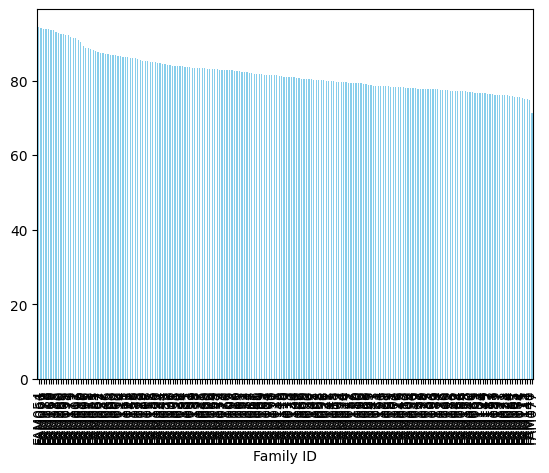

In [121]:
#plot
family_scores = data.groupby('Family ID')['Financial Score'].mean().sort_values(ascending = False)
family_scores.plot(kind = 'bar' , color = 'skyblue')



/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/anaconda3/lib/python3.11/si

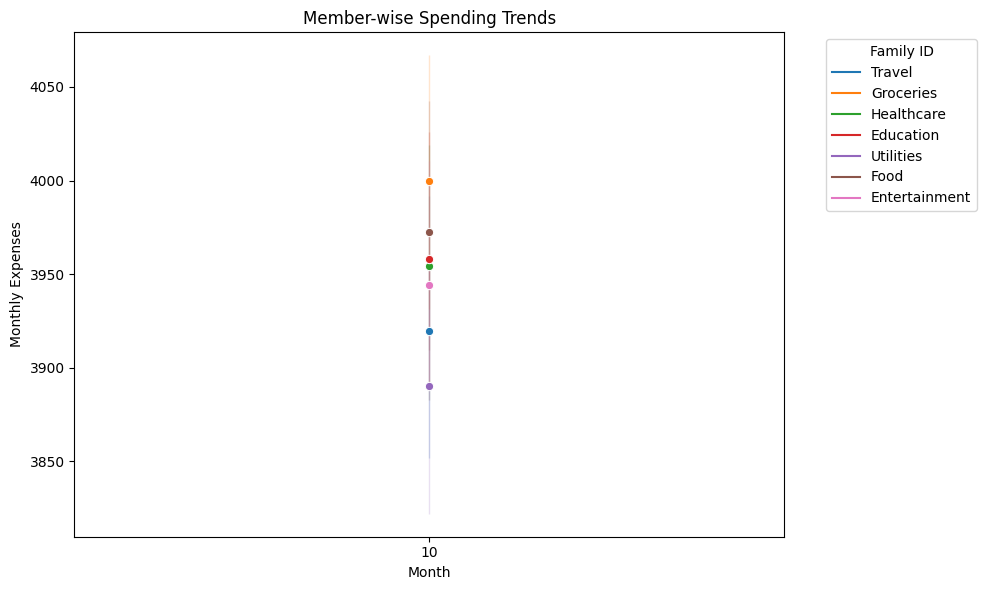

In [122]:
data['Month'] = pd.to_datetime(data['Transaction Date']).dt.month  # Adjust 'Date' to the actual column name
data['Month'] = data['Month'].astype(str)  

# 3. Member-wise Spending Trends (Line Plot for Example Category)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Monthly Expenses', data=data, hue='Category', marker='o')
plt.title('Member-wise Spending Trends')
plt.xlabel('Month')
plt.ylabel('Monthly Expenses')
plt.legend(title='Family ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




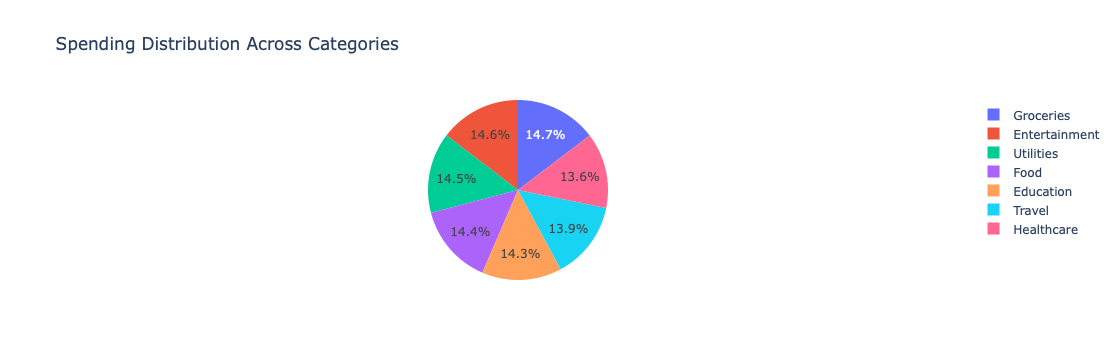

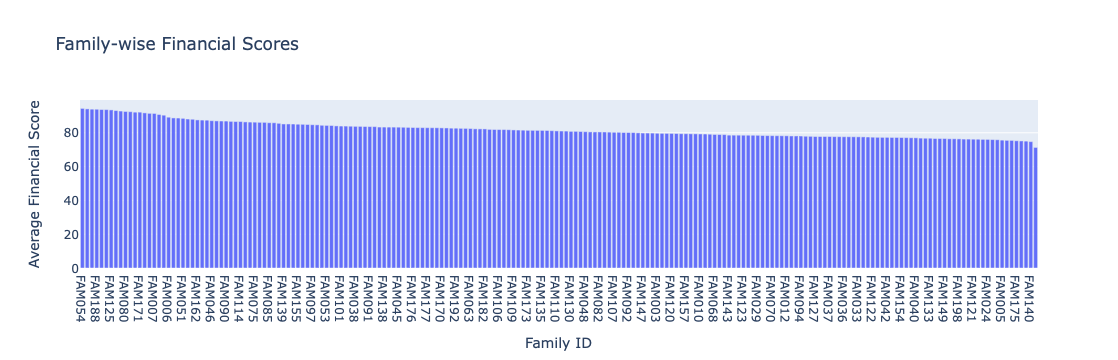

In [123]:
# 4. Alternative: Interactive Spending Distribution by Category using Plotly
fig = px.pie(data_frame=data, names='Category', title='Spending Distribution Across Categories')
fig.show()

# 5. Financial Scores Distribution (Plotly)
fig2 = px.bar(family_scores, x=family_scores.index, y=family_scores.values, 
              labels={'x': 'Family ID', 'y': 'Average Financial Score'}, 
              title='Family-wise Financial Scores')
fig2.show()


In [124]:
# Saving to a pickle file
with open('family_scores.pkl', 'wb') as file:
    pickle.dump(family_scores, file)

print("Pickle file 'family_scores.pkl' has been saved successfully.")

Pickle file 'family_scores.pkl' has been saved successfully.
